In [21]:
import pandas as pd
import numpy as np
from utils.utils import load_all_games_csv, get_teams
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Travel Distance Analysis
This notebook will examine the relationship between travel distance and the probability of a given team winning.

## Get all Games

In [2]:
all_games = load_all_games_csv('../data/gameinfo_cleaned.csv')

/Users/lancehendricks/Documents/College Coding/ML/Elo Ratings/src/utils/utils.py:18: DtypeWarning: Columns (10,11,13,17,19,21,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  all_games = pd.read_csv(filename)


## Win % vs Travel Distance

Text(0.5, 1.0, 'Win % vs Distance Traveled')

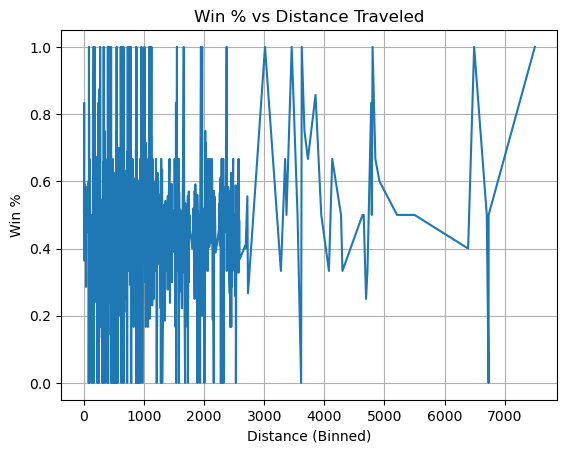

In [25]:
# Get travel dists for away games - ignore home games, since they are always 0 and may be confused with home field advantage

dist_stats = all_games.groupby(by='visdistancetraveled').agg({'homewon':lambda x:(1-x).sum(), 'visteam':'count'}).rename(columns={'homewon':'Wins', 'visteam':'Games'})

dist_stats['Win %'] = dist_stats['Wins'] / dist_stats['Games']

plt.plot(dist_stats.index, dist_stats['Win %'])
plt.grid()
plt.xlabel('Distance (Binned)')
plt.ylabel('Win %')
plt.title('Win % vs Distance Traveled')

## Try Different Exponentiations of Travel Distance to Accurately Predict Win %

In [39]:
train_df = all_games.sample(frac=0.8)
test_df = all_games[~all_games.index.isin(train_df.index)]

In [ ]:
# Get X train/test and y train/test
Xs = []
ys = []
for df in [train_df, test_df]:
    dist_stats = df.groupby(by='visdistancetraveled').agg({'homewon':lambda x:(1-x).sum(), 'visteam':'count'}).rename(columns={'homewon':'Wins', 'visteam':'Games'})

    dist_stats['Win %'] = dist_stats['Wins'] / dist_stats['Games']
    
    X = dist_stats.index.to_numpy().reshape(-1,1) 
    y = dist_stats['Win %'].to_numpy().reshape(-1,1)
    
    Xs.append(X)
    ys.append(y)
    
X_train = Xs[0]
X_test = Xs[1]
y_train = ys[0]
y_test = ys[1]

Text(0.5, 1.0, 'Test MSE vs Exponent Base')

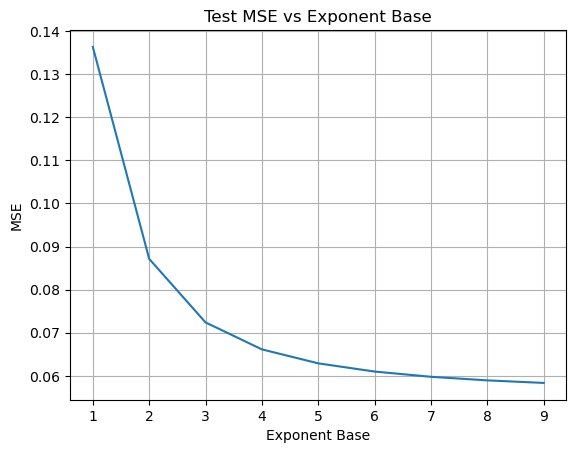

In [41]:
exponent_bases = list(range(1,10,1))
mses = []

for base in exponent_bases:
    X_train_base = X_train ** (1/base)
    X_test_base = X_test ** (1/base)
    
    lr = LinearRegression(fit_intercept=False)
    
    lr.fit(X_train_base,y_train)
    
    y_hat = lr.predict(X_test_base)
    mse = mean_squared_error(y_test, y_hat)
    mses.append(mse)
    
plt.plot(exponent_bases, mses)
plt.grid()
plt.xlabel("Exponent Base")
plt.ylabel("MSE")
plt.title("Test MSE vs Exponent Base")
    

## Visualize exponent bins

Text(0.5, 1.0, 'Win % vs Distance Traveled')

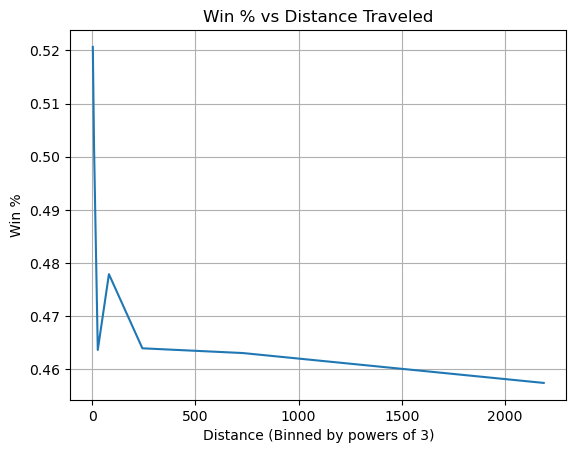

In [30]:
# Bin travel distance 
expon_base = 3

bins = pd.Series([expon_base**x for x in range(1,8)])
# Get bin for each row
all_games['visdistancebin'] = all_games['visdistancetraveled'].apply(lambda x: bins[x < bins].min())

# Get travel dists for away games - ignore home games, since they are always 0 and may be confused with home field advantage

binned_dist_stats = all_games.groupby(by='visdistancebin').agg({'homewon':lambda x:(1-x).sum(), 'visteam':'count'}).rename(columns={'homewon':'Wins', 'visteam':'Games'})

binned_dist_stats['Win %'] = binned_dist_stats['Wins'] / binned_dist_stats['Games']

plt.plot(binned_dist_stats.index, binned_dist_stats['Win %'])
plt.grid()
plt.xlabel(f'Distance (Binned by powers of {expon_base})')
plt.ylabel('Win %')
plt.title('Win % vs Distance Traveled')